In [ ]:
pip install scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: /Users/mayaaboelkhier/PycharmProjects/pythonProject8/venv/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("/Users/mayaaboelkhier/Downloads/last_customer.csv")
df.head()

,Unnamed: 0,Government,Location,Services,Direction URL,Latitude,Longitude,Withdraw,deposit,Currency-exchange
0,0,Al-Behera,مدخل المدينة الجديدة بجوار فتح الله ماركت,سحب فقط,"http://maps.google.com/maps?q=31.130591,30.122248",31.130591,30.122248,1,0,0
1,1,Al-Behera,ش المدارس - أبوحمص,سحب فقط,"http://maps.google.com/maps?q=31.1033,30.310782",31.103300,30.310782,1,0,0
2,2,Al-Behera,الوحدة المحلية بأبوحمص,سحب فقط,"http://maps.google.com/maps?q=31.100602,30.31555",31.100602,30.315550,1,0,0
3,3,Al-Behera,محطة العطف لإنتاج الكهرباء - المحمودية - الاسك...,سحب فقط,"http://maps.google.com/maps?q=31.184945,30.52952",31.184945,30.529520,1,0,0
4,4,Al-Behera,الطريق الزراعي - قبل مصنع الغزال ب 1كم - المحم...,سحب فقط,"http://maps.google.com/maps?q=31.175947,30.529477",31.175947,30.529477,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3750 non-null   int64  
 1   Government         3750 non-null   object 
 2   Location           3750 non-null   object 
 3   Services           3750 non-null   object 
 4   Direction URL      3750 non-null   object 
 5   Latitude           3750 non-null   float64
 6   Longitude          3750 non-null   float64
 7   Withdraw           3750 non-null   int64  
 8   deposit            3750 non-null   int64  
 9   Currency-exchange  3750 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 293.1+ KB


In [ ]:
df.isnull().sum()

Unnamed: 0           0
Government           0
Location             0
Services             0
Direction URL        0
Latitude             0
Longitude            0
Withdraw             0
deposit              0
Currency-exchange    0
dtype: int64

In [ ]:
df['Government'].value_counts()

Government
cairo               778
Giza                438
Alexandria          261
Dakahlia            185
Sohag               152
Al-Monoufia         150
Qalioubia           143
Al-Sharkia          143
Red_Sea             135
Al-Gharbia          131
Al-Behera           126
Luxor               117
South Sinai         115
Ismailia            114
Aswan               108
Al-Menia             99
Assiut               90
Port Said            83
Qena                 80
Beni Suef            80
Kafr Al-Shiekh       67
Damietta             47
Al-Fayoum            38
Al-Wadi Al-Jadid     26
Suez                 26
North Sinai           9
Marsa Matrouh         9
Name: count, dtype: int64

In [ ]:
df

,Unnamed: 0,Government,Location,Services,Direction URL,Latitude,Longitude,Withdraw,deposit,Currency-exchange
0,0,Al-Behera,مدخل المدينة الجديدة بجوار فتح الله ماركت,سحب فقط,"http://maps.google.com/maps?q=31.130591,30.122248",31.130591,30.122248,1,0,0
1,1,Al-Behera,ش المدارس - أبوحمص,سحب فقط,"http://maps.google.com/maps?q=31.1033,30.310782",31.103300,30.310782,1,0,0
2,2,Al-Behera,الوحدة المحلية بأبوحمص,سحب فقط,"http://maps.google.com/maps?q=31.100602,30.31555",31.100602,30.315550,1,0,0
3,3,Al-Behera,محطة العطف لإنتاج الكهرباء - المحمودية - الاسك...,سحب فقط,"http://maps.google.com/maps?q=31.184945,30.52952",31.184945,30.529520,1,0,0
4,4,Al-Behera,الطريق الزراعي - قبل مصنع الغزال ب 1كم - المحم...,سحب فقط,"http://maps.google.com/maps?q=31.175947,30.529477",31.175947,30.529477,1,0,0
...,...,...,...,...,...,...,...,...,...,...
3745,4343,Suez,شركه المياه هيئه قناه السويس,سحب - إيداع - تغيير عملة,"http://maps.google.com/maps?q=29.967446,32.550833",29.967446,32.550833,1,1,1
3746,4344,Suez,منطقة الشركة المصرية الصينية المشتركة للاستثما...,سحب فقط,http://maps.google.com/maps?q=29.6702974950001...,29.670297,32.317752,1,0,0
3747,4345,Suez,فيصل السويس,سحب فقط,"http://maps.google.com/maps?q=29.989517173,32....",29.989517,32.520274,1,0,0
3748,4352,Suez,حرم ميناء الأدبية – طريق السخنة – محافظة السويس,سحب - إيداع - تغيير عملة,http://maps.google.com/maps?q=29.8874359910001...,29.887436,32.461809,1,1,1


In [ ]:
pip install requests


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: /Users/mayaaboelkhier/PycharmProjects/pythonProject8/venv/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import requests
import pandas as pd
from math import sin, cos, sqrt, atan2, radians


def find_nearest_atm(user_latitude, user_longitude, service_type):
    df['Distance'] = np.sqrt((df['Latitude'] - user_latitude)**2 + (df['Longitude'] - user_longitude)**2)

    if service_type == 'Withdraw':
        atms_with_service = df[df['Withdraw'] == 1]
    elif service_type == 'Deposit':
        atms_with_service = df[df['deposit'] == 1]
    elif service_type == 'Currency-exchange':
        atms_with_service = df[df['Currency-exchange'] == 1]
    else:
        raise ValueError("Invalid service type")

    # Find the nearest ATM
    nearest_atm = atms_with_service[atms_with_service['Distance'] == atms_with_service['Distance'].min()]
    return nearest_atm

# Example user input
user_latitude = 60.7749
user_longitude = 60.4194
service_type = 'Withdraw'

# Find the nearest ATM with the desired service
nearest_atm = find_nearest_atm(user_latitude, user_longitude, service_type)

# Print the resulting nearest ATM
print(nearest_atm)

      Unnamed: 0     Government  \
3003        3559  Marsa Matrouh   
3012        3568    North Sinai   

                                               Location Services  \
3003  مقر ديوان عام محافظة شمال سيناء بشارع الفاتح ـ...  سحب فقط   
3012  مقر ديوان عام محافظة شمال سيناء بشارع الفاتح ـ...  سحب فقط   

                                          Direction URL   Latitude  Longitude  \
3003  http://maps.google.com/maps?q=31.143824,33.830633  31.143824  33.830633   
3012  http://maps.google.com/maps?q=31.143824,33.830633  31.143824  33.830633   

      Withdraw  deposit  Currency-exchange   Distance  
3003         1        0                  0  39.811596  
3012         1        0                  0  39.811596  


In [ ]:
pip install folium ipywidgets



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: /Users/mayaaboelkhier/PycharmProjects/pythonProject8/venv/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import folium
import ipywidgets as widgets
from IPython.display import display

def visualize_nearest_atm_on_map(df, user_latitude, user_longitude, service_type):
    m = folium.Map(location=[user_latitude, user_longitude], zoom_start=12)

    if service_type == 'Withdraw':
        atms_with_service = df[df['Withdraw'] == 1].copy()
    elif service_type == 'Deposit':
        atms_with_service = df[df['deposit'] == 1].copy()
    elif service_type == 'Currency-exchange':
        atms_with_service = df[df['Currency-exchange'] == 1].copy()
    else:
        raise ValueError("Invalid service type")

    # Calculate distance from user to ATMs and find nearest ATM
    atms_with_service['Distance'] = ((atms_with_service['Latitude'] - user_latitude)**2 +
                                     (atms_with_service['Longitude'] - user_longitude)**2)**0.5
    nearest_atm = atms_with_service.loc[atms_with_service['Distance'].idxmin()]

    # Add marker for the nearest ATM only
    folium.Marker([nearest_atm['Latitude'], nearest_atm['Longitude']], popup=nearest_atm['Location']).add_to(m)

    display(m)

    return nearest_atm

In [ ]:
user_latitude_input = widgets.FloatText(value=60.7749, description='Latitude:')
user_longitude_input = widgets.FloatText(value=60.4194, description='Longitude:')
service_type_input = widgets.Dropdown(options=['Withdraw', 'Deposit', 'Currency-exchange'], description='Service:')
visualize_button = widgets.Button(description='Visualize')
output = widgets.Output()


In [ ]:
def on_visualize_button_clicked(b):
    with output:
        output.clear_output()
        nearest_atm = visualize_nearest_atm_on_map(df, user_latitude_input.value, user_longitude_input.value, service_type_input.value)
        print("Nearest ATM:")
        print(nearest_atm)

visualize_button.on_click(on_visualize_button_clicked)

widgets.VBox([user_latitude_input, user_longitude_input, service_type_input, visualize_button, output])

In [ ]:
pip install openrouteservice


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: /Users/mayaaboelkhier/PycharmProjects/pythonProject8/venv/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from math import radians, sin, cos, sqrt, atan2

# Assuming your data is stored in a pandas DataFrame named 'data'
# Extract lat and long columns for clustering
coordinates = df[['Latitude', 'Longitude']].values

# Convert latitude and longitude to radians
coords_in_radians = np.radians(coordinates)

# Function to calculate haversine distance between two points
def haversine_distance(point1, point2):
    radius = 6371.0  # Radius of the Earth in kilometers
    lat1, lon1 = point1
    lat2, lon2 = point2
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = radius * c
    return distance

# Calculate haversine distance matrix
num_points = len(coordinates)
hav_distance_matrix = np.zeros((num_points, num_points))

for i in range(num_points):
    for j in range(num_points):
        hav_distance_matrix[i, j] = haversine_distance(coords_in_radians[i], coords_in_radians[j])

# Initialize AgglomerativeClustering with 'complete' linkage
n_clusters = 15 # Adjust this based on your dataset
agglomerative = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='complete')

# Fit the model using the distance matrix
agglomerative_labels = agglomerative.fit_predict(hav_distance_matrix)

# Add the cluster labels back to the DataFrame
df['Cluster'] = agglomerative_labels

# Print the number of clusters
num_clusters = len(np.unique(agglomerative_labels))
print(f"Number of clusters: {num_clusters}")

# Now you can use the cluster labels to optimize the filling route using OSRM


Number of clusters: 15


/Users/mayaaboelkhier/PycharmProjects/pythonProject8/venv/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
df['Cluster'].value_counts()

Cluster
1     1790
13     473
4      416
2      303
0      301
10     163
6      114
12     105
5       25
8       24
11      18
14       7
7        5
3        3
9        3
Name: count, dtype: int64

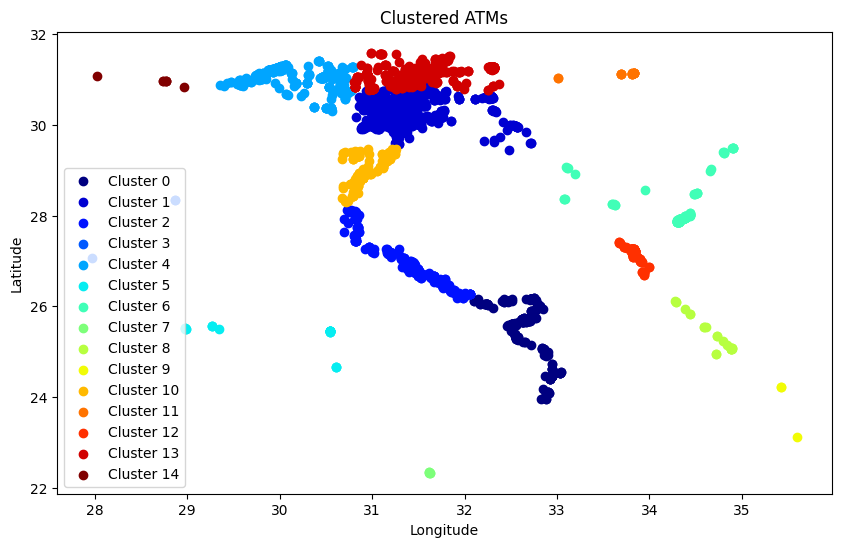

In [ ]:
import matplotlib.pyplot as plt
# Plot the clusters on a map
plt.figure(figsize=(10, 6))
colors = plt.cm.jet(np.linspace(0, 1, n_clusters))

for cluster_id in range(n_clusters):
    cluster_points = coordinates[agglomerative_labels == cluster_id]
    plt.scatter(cluster_points[:, 1], cluster_points[:, 0], color=colors[cluster_id], label=f'Cluster {cluster_id}')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustered ATMs')
plt.legend()
plt.show()

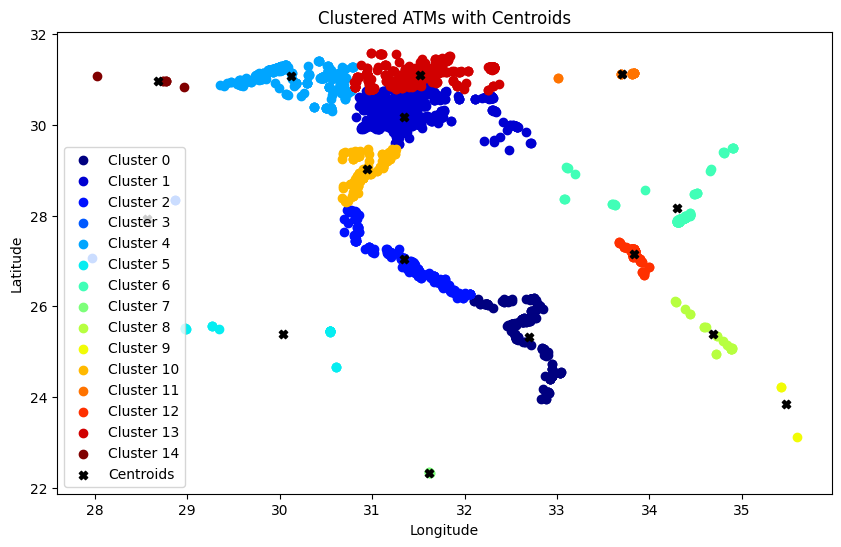

In [ ]:
# Calculate mean lat and mean long for each cluster
cluster_centers = df.groupby('Cluster')[['Latitude', 'Longitude']].mean()

# Plot the clusters and their centroids on a map
plt.figure(figsize=(10, 6))
colors = plt.cm.jet(np.linspace(0, 1, n_clusters))

for cluster_id in range(n_clusters):
    cluster_points = coordinates[agglomerative_labels == cluster_id]
    plt.scatter(cluster_points[:, 1], cluster_points[:, 0], color=colors[cluster_id], label=f'Cluster {cluster_id}')

# Plot the cluster centroids
plt.scatter(cluster_centers['Longitude'], cluster_centers['Latitude'], color='black', marker='X', label='Centroids')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustered ATMs with Centroids')
plt.legend()
plt.show()

In [ ]:
pip install ortools


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: /Users/mayaaboelkhier/PycharmProjects/pythonProject8/venv/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
df.head()

,Unnamed: 0,Government,Location,Services,Direction URL,Latitude,Longitude,Withdraw,deposit,Currency-exchange,Distance,Cluster
0,0,Al-Behera,مدخل المدينة الجديدة بجوار فتح الله ماركت,سحب فقط,"http://maps.google.com/maps?q=31.130591,30.122248",31.130591,30.122248,1,0,0,42.387527,4
1,1,Al-Behera,ش المدارس - أبوحمص,سحب فقط,"http://maps.google.com/maps?q=31.1033,30.310782",31.103300,30.310782,1,0,0,42.272127,4
2,2,Al-Behera,الوحدة المحلية بأبوحمص,سحب فقط,"http://maps.google.com/maps?q=31.100602,30.31555",31.100602,30.315550,1,0,0,42.270625,4
3,3,Al-Behera,محطة العطف لإنتاج الكهرباء - المحمودية - الاسك...,سحب فقط,"http://maps.google.com/maps?q=31.184945,30.52952",31.184945,30.529520,1,0,0,42.059129,4
4,4,Al-Behera,الطريق الزراعي - قبل مصنع الغزال ب 1كم - المحم...,سحب فقط,"http://maps.google.com/maps?q=31.175947,30.529477",31.175947,30.529477,1,0,0,42.065491,4


In [ ]:
# pip install pyconcorde


In [ ]:
import numpy as np
from scipy.spatial import distance_matrix
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp
import folium

# Assuming your data is stored in a pandas DataFrame named 'df'
# Extract ATM lat and long columns for routing
cluster_number = 1  # Change to the desired cluster number
atm_data = df[df['Cluster'] == cluster_number]
atm_coordinates = atm_data[['Latitude', 'Longitude']].values

# Calculate distance matrix
distance_matrix = distance_matrix(atm_coordinates, atm_coordinates)

# Parameters
num_cities = len(atm_coordinates)

# Create a routing model
manager = pywrapcp.RoutingIndexManager(num_cities, 1, 0)
routing = pywrapcp.RoutingModel(manager)

# Create a transit callback
def distance_callback(from_index, to_index):
    return int(distance_matrix[from_index][to_index] * 1000)  # Convert to meters

transit_callback_index = routing.RegisterTransitCallback(distance_callback)

# Define cost of each arc
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

# Set 1 vehicle with its start and end node
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = (routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

# Solve the problem
solution = routing.SolveWithParameters(search_parameters)

# Extract the optimal route
if solution:
    index = routing.Start(0)
    optimal_route = []
    while not routing.IsEnd(index):
        node_index = manager.IndexToNode(index)
        optimal_route.append(node_index)
        index = solution.Value(routing.NextVar(index))

    # Print the final route and total distance
    print("Final route order:", optimal_route)
    print("Total distance:", solution.ObjectiveValue() / 1000, "km")

    # Create a folium map centered at the first ATM
    m = folium.Map(location=[atm_coordinates[optimal_route[0]][0], atm_coordinates[optimal_route[0]][1]], zoom_start=12)

    # Add markers for all ATMs
    for idx in optimal_route:
        folium.Marker([atm_coordinates[idx][0], atm_coordinates[idx][1]]).add_to(m)

    # Add polyline for the route
    folium.PolyLine([(atm_coordinates[idx][0], atm_coordinates[idx][1]) for idx in optimal_route], color='blue').add_to(m)

    # Save the map as an HTML file
    display(m)
else:
    print("No solution found.")


Final route order: [0, 9, 14, 5, 11, 3, 10, 2, 1078, 1076, 1063, 1080, 1075, 1067, 1066, 7, 8, 1, 13, 16, 15, 6, 4, 12, 1068, 1072, 1062, 1058, 1060, 1070, 1065, 1061, 1069, 1074, 1073, 85, 36, 137, 108, 89, 106, 59, 22, 94, 99, 93, 91, 92, 67, 66, 65, 111, 103, 107, 62, 149, 26, 143, 123, 114, 115, 88, 61, 146, 148, 147, 77, 136, 117, 116, 96, 95, 60, 57, 21, 34, 98, 102, 131, 118, 64, 132, 56, 80, 113, 39, 105, 133, 58, 83, 87, 63, 134, 122, 126, 37, 75, 68, 27, 125, 42, 90, 17, 144, 130, 55, 76, 142, 109, 43, 71, 23, 84, 40, 25, 24, 19, 31, 35, 138, 82, 45, 73, 104, 48, 129, 128, 112, 127, 44, 30, 101, 110, 49, 28, 29, 18, 70, 97, 47, 124, 46, 79, 38, 20, 141, 145, 81, 41, 140, 139, 86, 33, 120, 119, 54, 51, 121, 52, 74, 53, 100, 135, 78, 50, 1461, 1470, 69, 1462, 1422, 1288, 1476, 1218, 1349, 1155, 1378, 1416, 1142, 1243, 1439, 1108, 1356, 1172, 1254, 1234, 1200, 1320, 1258, 1178, 1176, 1463, 1469, 1430, 1280, 1246, 1198, 1444, 1484, 1425, 1464, 1129, 1447, 1483, 1203, 1454, 1423, 